<a href="https://colab.research.google.com/github/ashrafalaghbari/customer_churn_prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from math import inf

In [2]:
df =  pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

* **Demographic variables:** 'gender', 'SeniorCitizen', 'Partner', 'Dependents'
* **Contracts and billing:** 'Contract', 'PaperlessBilling','PaymentMethod',
* **Additional services used:** 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'
* **Customer monetary value and tenure:** 'MonthlyCharges', 'TotalCharges','tenure'
* **Churn behavior:** 'Churn'

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# remove customerID variable 
del df['customerID']

In [6]:
# convert the data type of senior citizen to int8 so I can include in the categorical features
df['SeniorCitizen'] = df['SeniorCitizen'].astype('int8') 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
#count both categorical and numerical columns
cat_features = df.select_dtypes(include=['object', 'int8'])
num_features = df.select_dtypes(include=['int64', 'float64'])

print(f"The number of categorical features in the DataFrame is: {cat_features.shape[1]}")
print(f"The number of numerical features in the DataFrame is: {num_features.shape[1]}")

The number of categorical features in the DataFrame is: 17
The number of numerical features in the DataFrame is: 3


In [8]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* Since the customer has a tenure of zero, they have not been using the product or service for any complete billing cycle, and therefore their total charges should be zero.

In [10]:
df.loc[df['tenure']==0, 'TotalCharges'] = 0

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
#Encoding  categorical features with more than two categories
df = pd.get_dummies(df, drop_first=True)

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV

predictors = df.drop(['Churn_Yes'], axis=1)
target = df['Churn_Yes']
# split data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)
print(f'Training set: {X_train.shape} shape')
print(f'Test set: {X_test.shape} shape')

Training set: (5634, 30) shape
Test set: (1409, 30) shape


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Develope a LR model

In [108]:
#optimize the model
# Define hyperparameter grid
param_grid = {
    # 'penalty': ['l1', 'l2'],
    'C': [0.1, 1],
    'solver': ['liblinear', 'saga'],
    'max_iter': [200, 400]
# 
}

# Create logistic regression model
lr_model = LogisticRegression(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(lr_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
# Access the mean and std of the test scores (accuracy) for each fold
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']

# Access the index of the best combination
best_index = grid_search.best_index_

# Get the mean and std of the test score (accuracy) for the best combination
best_mean_score = mean_scores[best_index]
best_std_score = std_scores[best_index]
# print("\033[1m"+'Average cross-validation scores(5-Fold) after oversampling the minority class= 0 (not very toxic):'+"\033[0;0m")
print(f"\nBest combination ({grid_search.best_params_}):\nMean accuracy = {best_mean_score}, std = {best_std_score}")


Average cross-validation scores(5-Fold) after oversampling the minority class= 0 (not very toxic):

Best combination ({'C': 0.1, 'max_iter': 200, 'solver': 'liblinear'}):
Mean accuracy = 0.8029813979804603, std = 0.008182829046160715


In [110]:
# Evalue the predictive performance of Logistic Regression model based on the optimal hyperparameters 
lr_model = LogisticRegression(C= 0.1, max_iter = 200, solver = 'liblinear', random_state=42)
lr_model.fit(X_train, y_train)
# Make predictions using LR model
y_pred_lr = lr_model.predict(X_test)

In [111]:
# Evaluate the LR model
# Calculate classification report for LR model
cr_lr = classification_report(y_test, y_pred_lr)
print('Classification report for Logistic Regression model:\n', cr_lr)

Classification report for Logistic Regression model:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



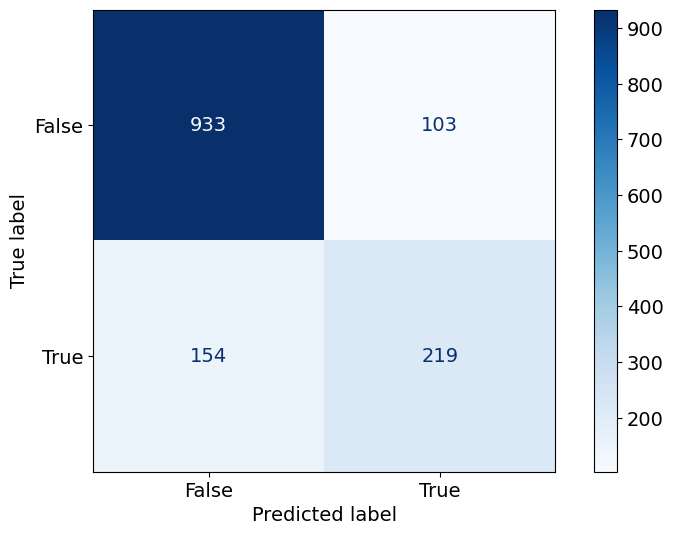

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# set plot style to ggplot2
plt.style.use('default')
# maximize the size of the labels, ticks, and figures
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
confusion_matrix = confusion_matrix(y_test, y_pred_lr)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap='Blues')
plt.show()

In [74]:
y_train.value_counts()

0    4138
1    1496
Name: Churn_Yes, dtype: int64

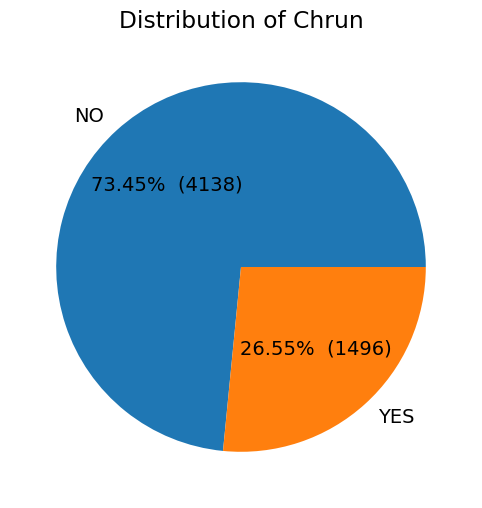

In [78]:
explode = [0.03,0.1]
plt.title('Class Distribution')
plt.ylabel("")

values = [y_train.value_counts()[0],y_train.value_counts()[1]] 
labels = ['NO','YES'] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.title('Distribution of Chrun')
plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.show()

In [102]:
from imblearn.over_sampling import RandomOverSampler
#Random oversampling
ros = RandomOverSampler(sampling_strategy=1) # 1 -> resample all classes but the majority class
X_train_ros, y_train_res = ros.fit_resample(X_train, y_train)

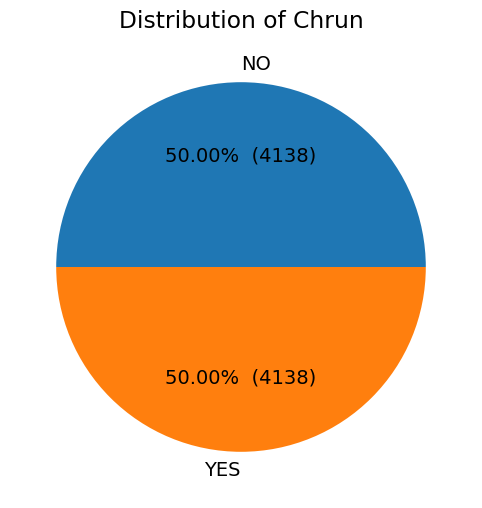

In [103]:
explode = [0.03,0.1]
plt.title('Class Distribution')
plt.ylabel("")

values = [y_train_ros.value_counts()[0],y_train_ros.value_counts()[1]] 
labels = ['NO','YES'] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.title('Distribution of Chrun')
plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.show()

In [105]:
#optimize the model
# Define hyperparameter grid
param_grid = {
    # 'penalty': ['l1', 'l2'],
    'C': [0.1, 1],
    'solver': ['liblinear', 'saga'],
    'max_iter': [200, 400]
# 
}

# Create logistic regression model
lr_model_ros = LogisticRegression(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(lr_model_ros, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_ros, y_train_ros)

# Print best hyperparameters and corresponding score
# Access the mean and std of the test scores (accuracy) for each fold
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']

# Access the index of the best combination
best_index = grid_search.best_index_

# Get the mean and std of the test score (accuracy) for the best combination
best_mean_score = mean_scores[best_index]
best_std_score = std_scores[best_index]
print("\033[1m"+'Average cross-validation scores(5-Fold) after oversampling the minority class= 0 (not churn):'+"\033[0;0m")
print(f"\nBest combination ({grid_search.best_params_}):\nMean accuracy = {best_mean_score}, std = {best_std_score}")


Average cross-validation scores(5-Fold) after oversampling the minority class= 0 (not churn):

Best combination ({'C': 0.1, 'max_iter': 200, 'solver': 'liblinear'}):
Mean accuracy = 0.810547747274399, std = 0.06461697884228652


In [112]:
# Evalue the predictive performance of Logistic Regression model based on the optimal hyperparameters 
lr_model_ros = LogisticRegression(C= 0.1, max_iter = 200, solver = 'liblinear', random_state=42)
lr_model_ros.fit(X_train_ros, y_train_ros)
# Make predictions using LR model
y_pred_lr_ros = lr_model_ros.predict(X_test)

In [113]:
# Evaluate the LR model
# Calculate classification report for LR model
cr_lr = classification_report(y_test, y_pred_lr_ros)
print('Classification report for Logistic Regression model:\n', cr_lr)

Classification report for Logistic Regression model:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85      1036
           1       0.58      0.72      0.64       373

    accuracy                           0.79      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.81      0.79      0.79      1409



# Develope a DT model

In [93]:
# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# Make predictions using DT model
y_pred_dt = dt_model.predict(X_test)

In [94]:
# Evaluate the DT model
# Calculate classification report for DT model
print('Classification report for Decision Tree model:')
print(classification_report(y_test, y_pred_dt))

Classification report for Decision Tree model:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.46      0.46      0.46       373

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409



In [114]:
# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_ros, y_train_ros)
# Make predictions using DT model
y_pred_dt_ros = dt_model.predict(X_test)

In [115]:
# Evaluate the DT model
# Calculate classification report for DT model
print('Classification report for Decision Tree model:')
print(classification_report(y_test, y_pred_dt_ros))

Classification report for Decision Tree model:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1036
           1       0.48      0.55      0.52       373

    accuracy                           0.72      1409
   macro avg       0.66      0.67      0.66      1409
weighted avg       0.74      0.72      0.73      1409



# Develope a RF model

In [98]:
# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# Make predictions using RF model
y_pred_rf = rf_model.predict(X_test)

In [99]:
# Calculate classification report for RF model
print('Classification report for Random Forest model:')
print(classification_report(y_test, y_pred_rf))

Classification report for Random Forest model:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.44      0.52       373

    accuracy                           0.78      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [116]:
# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_ros, y_train_ros)
# Make predictions using RF model
y_pred_rf_ros = rf_model.predict(X_test)

In [117]:
# Calculate classification report for RF model
print('Classification report for Random Forest model:')
print(classification_report(y_test, y_pred_rf_ros))

Classification report for Random Forest model:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.57      0.57      0.57       373

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409

